# **Task 1**
# **Author - Sourin Biswas**
# **Linkedin - https://www.linkedin.com/in/sourin-biswas-7a8129209/**



## **Titanic EDA**

Dataset - https://www.kaggle.com/shuofxz/titanic-machine-learning-from-disaster/tasks?taskId=2692

**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import math
import warnings
from sklearn.metrics import accuracy_score
warnings.simplefilter("ignore", UserWarning)
warnings.warn('ignore', FutureWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: ignore
  # Remove the CWD from sys.path while we load stuff.


**Loading the Trainiing Dataset**

In [ ]:
titanic_df = pd.read_csv("train.csv")

**Exploring Data**

In [ ]:
titanic_df.head()   #first five rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.Age.mean()

29.69911764705882

In [ ]:
titanic_df.shape    #to get number of rows and columns

(891, 12)

In [ ]:
titanic_df.describe()  #to get percentile,mean,standard deviation of  numrical data 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. **This titanic dataset have 891 rows and 12 columns.**
2. **Age contains some missing values.**
3. **near about 50% of passengers were about the age of 28.**







**A. Checking missing values**

In [ ]:
titanic_df.isnull().sum()  #returns total number of missing values for each feature

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

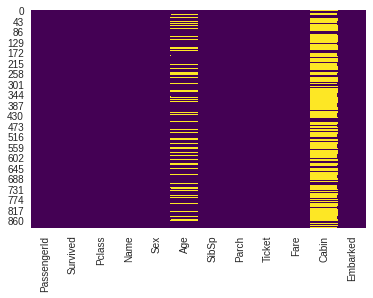

In [ ]:
sns.heatmap(titanic_df.isnull(),cbar = False , cmap = "viridis");  #visualizing the missing values in data

1. **Age and Embarked have a few missing values.**

2. **Cabin has high number of missing values out of 891 entries , 687 entries are missing , so we can drop this feature.**

**B. Dropping Cabin feature**

In [ ]:
titanic_df = titanic_df.drop("Cabin" , axis = 1)  #drop Cabin from axis =  1 i.e column

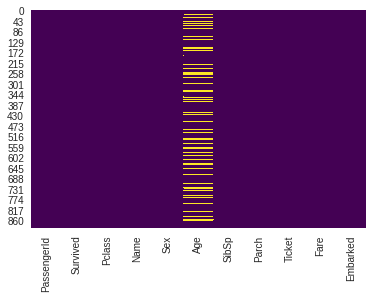

In [ ]:
sns.heatmap(titanic_df.isnull(),cbar = False , cmap = "viridis");  #visualizing the missing values in data

**Dropped Cabin Column**

**C. Handling Missing Data from Age and Embarked**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


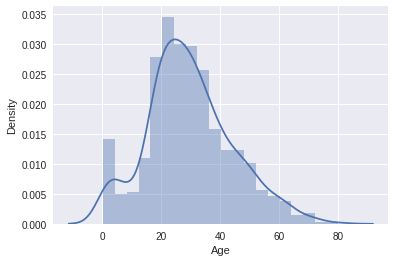

In [ ]:
sns.distplot(titanic_df['Age']) #to get ditribution of Age

**For Age feature, lots of values lie in between 20 to 40 and Mean value for Age is 29. So we can simply impute missing values with passengers' mean age.**

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())   #filling missing age value

In [ ]:
titanic_df.Age.isnull().sum() #to ensure that there lies no missing data

0

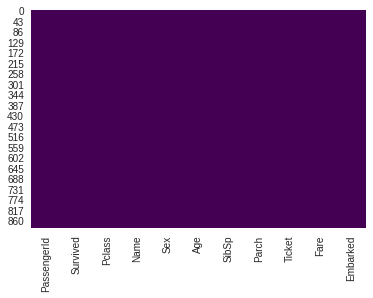

In [ ]:
sns.heatmap(titanic_df.isnull(),cbar = False , cmap = "viridis");  #to visualize if data is filled or not

**D. Imputing values for Embarked**

**We'll visualize mode for categorical data.**

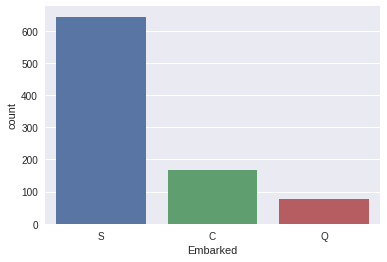

In [ ]:
sns.countplot(x = 'Embarked' , data = titanic_df)

**"S" have high frequecny among all other values.**

In [ ]:
titanic_df['Embarked']  = titanic_df['Embarked'].fillna("S")

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**All missing values have been imputed.**

**Exploratory Data Analysis**

In [ ]:
total_passengers = titanic_df.shape[0] #to get total number of passengers

In [ ]:
titanic_df['Survived'].value_counts() # 0 --> passenger didn't survive and 1--> passenger survived

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic_survived = titanic_df['Survived'].value_counts()[1]  #return number of passengers survived

In [ ]:
survived_passengers = titanic_survived/total_passengers * 100
f = '{0:.4g}'.format(survived_passengers)

print(f'{f}% passengers survived')

38.38% passengers survived


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


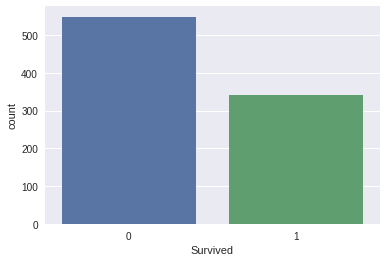

In [ ]:
sns.countplot(titanic_df.Survived)
plt.show()

**1. More than 61% people died in titanic tragedy.**


**2. From this sample data we can see more than 500 passengers died and only near about 300 survived.**


**Now, let's write a function to visualize insights among predictors and outcome!** 

In [ ]:
def countplot(column,data,hue):
  sns.countplot(x = column , data = data , hue = hue ,palette= 'rainbow')
  plt.show()

In [ ]:
passengers_survived = titanic_df[(titanic_df['Survived']==1)]   #to filter the dataset where passenger survived
passengers_not_survived = titanic_df[(titanic_df['Survived']==0)]   #to filter the dataset where passenger not survived

In [ ]:
female_passengers_survived = passengers_survived[titanic_df['Sex']=="female"] ##to filter the dataset where Sex is female and survived
f_female = female_passengers_survived.shape[0]*100 / passengers_survived.shape[0]  #to get percentage of female passengers survived

f = '{0:.4g}'.format(f_female)

print(f'{f}% female passengers survived')

68.13% female passengers survived


In [ ]:
male_passengers_survivied = passengers_survived[titanic_df['Sex']=='male']  #to filter the dataset where sex is male and he survived
f_male = male_passengers_survivied.shape[0]*100 / passengers_survived.shape[0] #to get percentage of male passengers survived
f = '{0:.4g}'.format(f_male)

print(f'{f}% male passengers survived')

31.87% male passengers survived


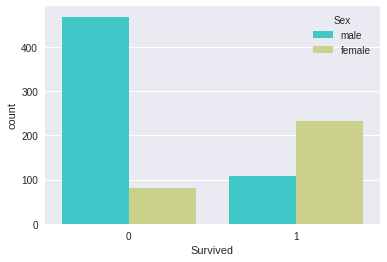

In [ ]:
countplot("Survived" , titanic_df , "Sex")

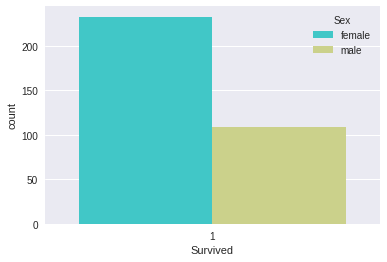

In [ ]:
countplot("Survived" , passengers_survived , hue = "Sex")

**1. From countplot we can clearly see those passengers who had survived have  more number of females than males.**


**2. 68.13% females passengers survived while only 31.87% male passengers survived.**

**3. This analysis shows females were priortised.**

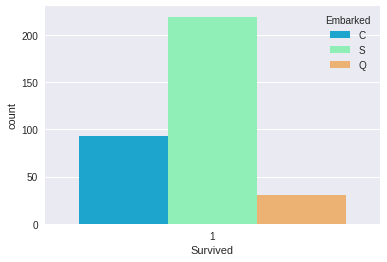

In [ ]:
countplot("Survived" , passengers_survived , hue = 'Embarked')

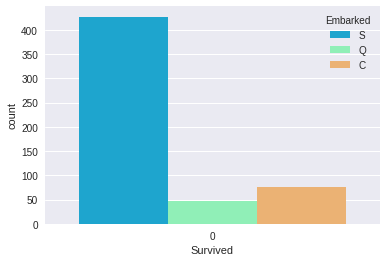

In [ ]:
countplot("Survived" , passengers_not_survived , hue = 'Embarked')

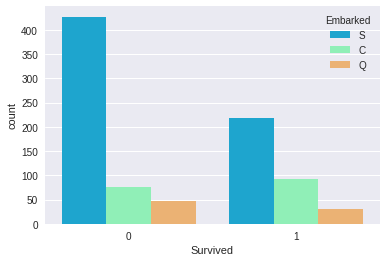

In [ ]:
countplot("Survived" , titanic_df , hue = 'Embarked')

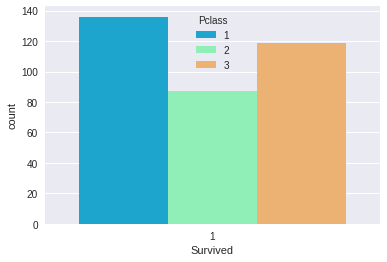

In [ ]:
countplot("Survived" , passengers_survived , hue = 'Pclass')

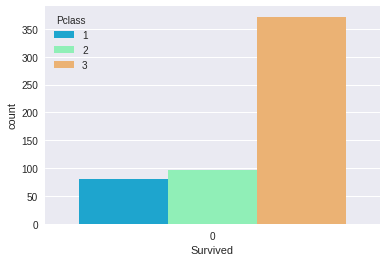

In [ ]:
countplot("Survived" , passengers_not_survived , hue = "Pclass")

**1.Passengers from Embarked "C" survived the most while people from Embarked "Q" didn't survived.**

**2. Passengers who were living in Pclass 1 survived the most while Passengers from Pclass 3 didn't Survived.**

In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

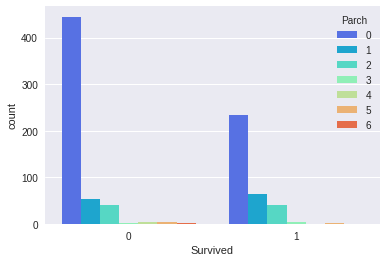

In [ ]:
countplot("Survived" , titanic_df,"Parch")

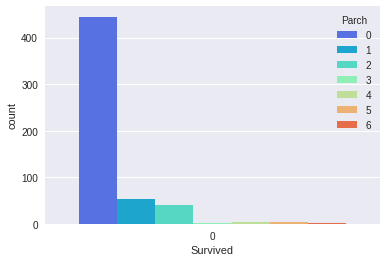

In [ ]:
countplot("Survived" , passengers_not_survived , "Parch")

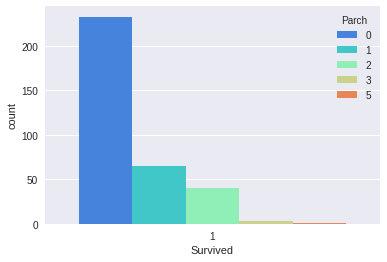

In [ ]:
countplot("Survived" , passengers_survived , "Parch")

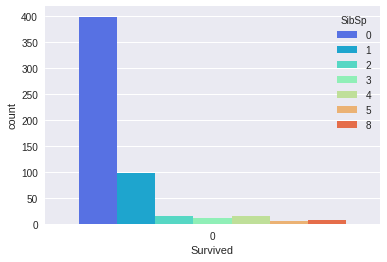

In [ ]:
countplot("Survived" , passengers_not_survived , "SibSp")

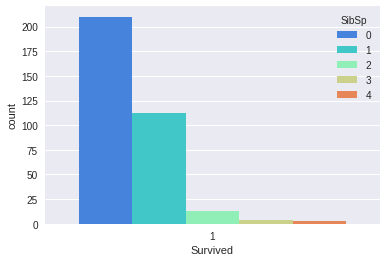

In [ ]:
countplot("Survived" , passengers_survived , "SibSp")

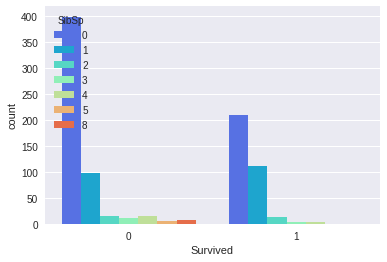

In [ ]:
countplot("Survived" , titanic_df , "SibSp")

## **Question - Does Fare Rate affects the passengers' safety?**

In [ ]:
titanic_df['Fare'].describe() #to get statistics of FARE feature

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
titanic_df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

**Fare range - 0 to 512**

**As Fare contains continuous data so first we need to group data in such a way so we can divide it into intervals**

In [ ]:
titanic_df['Fare_Intervals'] = pd.cut(titanic_df.Fare, [0,50,100,150,200,550]) #using pandas cut function to distribute data in intervals of 50

In [ ]:
piv_fare = titanic_df.pivot_table(index='Fare_Intervals', columns='Survived', values = 'Fare', aggfunc='count')
piv_fare

Survived,0,1
Fare_Intervals,,
"(0, 50]",484,232
"(50, 100]",37,70
"(100, 150]",5,19
"(150, 200]",3,6
"(200, 550]",6,14


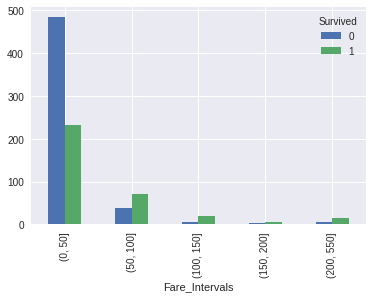

In [ ]:
piv_fare.plot(kind ='bar');

**1. Survival rate indeed depends on Fare price.**

**2. Interstingly, those who had the cheapest tickets (0 to 50) had the lowest chance of survival. In fact, (0 to 50) is the only fare range where the chance to die is higher than the chance to survive.**

## **Outliers detection**

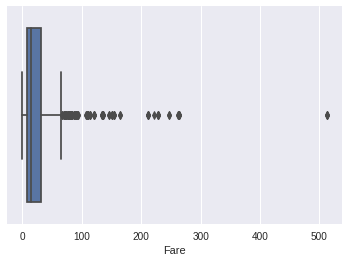

In [ ]:
sns.boxplot(x = "Fare" , data = titanic_df)

**it seems , Fare column has  outliers beyound 200 so we can replace this with median Fare**

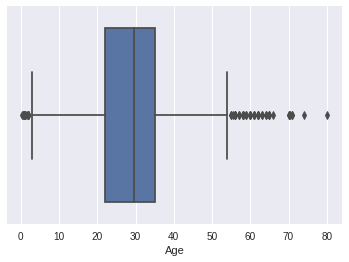

In [ ]:
sns.boxplot(x = "Age" , data = titanic_df)

In [ ]:
titanic_df['Fare'] = np.where(titanic_df["Fare"]>=200 ,titanic_df["Fare"].median() , titanic_df["Fare"])

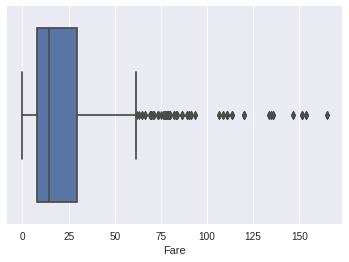

In [ ]:
sns.boxplot(x = "Fare" , data = titanic_df);

## **One HOT Encoding Data**
1. we use Label Encoding when we have Ordinal data i.e we can order our data example - ratings , cold,warm,hot.

2. we use One Hot Encoding when we have Nominal Data i.e no order in data example - color , Sex

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Intervals
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(0, 50]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(50, 100]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(0, 50]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(50, 100]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(0, 50]"


**we can drop Name , PassengerId , Ticket , Fare_intervals**

In [ ]:
def drop_columns(name , data): # function to drop columns from data inplace
  data = data.drop(name , axis = 1 , inplace = True)
  

In [ ]:
drop_columns(['Name','PassengerId' , 'Ticket','Fare_Intervals'] , titanic_df) #dropping columns from data

In [ ]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic_df = pd.get_dummies(data = titanic_df, columns=['Sex','Embarked'], drop_first=True)

In [ ]:
titanic_df.head() #where Sex_male is 0 that indicates female

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


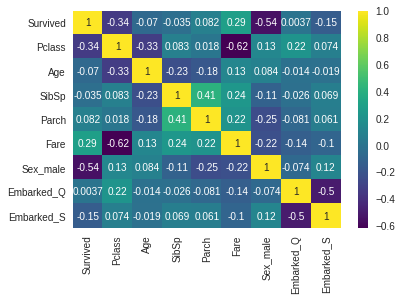

In [ ]:
sns.heatmap(titanic_df.corr() , annot = True , cmap = "viridis")  #to get correlation matrix in the form of heatmap

## **Train_Test_Split**




In [ ]:
X = titanic_df.drop("Survived" , axis = 1) #dropping target feature
X.shape

(891, 8)

In [ ]:
y = titanic_df.Survived #target variable
y.shape

(891,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_val ,y_train , y_val = train_test_split(X, y , test_size = 0.2 , random_state =42) #splitting data into train and validation data
print(f'shape of feature train  data  is : {X_train.shape} and for target train data is: { y_train.shape}')
print(f'shape of feature validation  data  is : {X_val.shape} and for target validation data is: { y_val.shape}')

shape of feature train  data  is : (712, 8) and for target train data is: (712,)
shape of feature validation  data  is : (179, 8) and for target validation data is: (179,)


## **Model Predictions**

In [ ]:
from sklearn import metrics
import pickle
def predict(ml_model,dump =0 ):  #a function to fit and make predictions on data
    model = ml_model.fit(X_train ,y_train)
    print(f'training score is : {model.score(X_train ,y_train)}')
    predictions = model.predict(X_val)
    print(f"testing score is :{model.score(X_val,y_val)}")
    print(f'Accuracy is: {accuracy_score(predictions , y_val)}')
  
    sns.distplot(predictions - y_val)
    if dump ==1:
        file = open("model.pkl",'wb')
        pickle.dump(model,file)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier()

training score is : 0.9789325842696629
testing score is :0.8212290502793296
Accuracy is: 0.8212290502793296


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


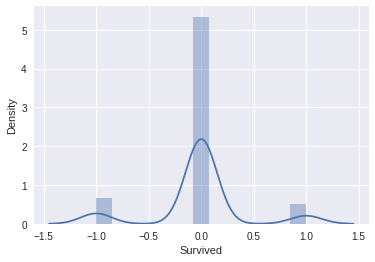

In [ ]:
predict(model)

### **Random forest classifier gives accuracy of 81.56% we can use cross validation techniques to improve accuracy a bit further.**

## **Hyper parameter tuning using cross validation techniques**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(50,1200,num = 6)]
max_depth = [int(x) for x in np.linspace(5,30 , num = 4)]

In [ ]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [ ]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [50, 280, 510, 740, 970, 1200]}

In [ ]:
random_cv = RandomizedSearchCV(estimator=model , param_distributions=random_grid , verbose=2,cv = 3 , n_jobs=-1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.6s finished


training score is : 0.8539325842696629
testing score is :0.8212290502793296
Accuracy is: 0.8212290502793296


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


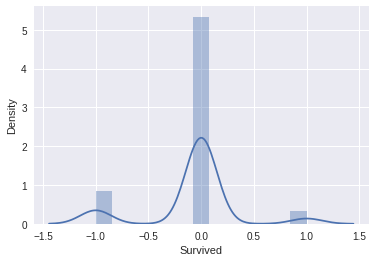

In [ ]:
predict(random_cv,1)

## **By using cross validation techniques we increased our model accuracy from 81.56% to 82.12%** 

## **Predictions on Test Set**

In [ ]:
titanic_df = pd.read_csv("test.csv")
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
def drop_columns(name , data): # function to drop columns from data inplace
  data = data.drop(name , axis = 1 , inplace = True)

In [ ]:
titanic_df = titanic_df.drop("Cabin" , axis = 1)  #drop Cabine from axis =  1 i.e column
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())   #filling missing age value
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())   #filling missing age value
titanic_df['Embarked']  = titanic_df['Embarked'].fillna("S")
titanic_df['Fare'] = np.where(titanic_df["Fare"]>=200 ,titanic_df["Fare"].median() , titanic_df["Fare"])
drop_columns(['Name','PassengerId' , 'Ticket'] , titanic_df) #dropping columns from data
titanic_df = pd.get_dummies(data = titanic_df, columns=['Sex','Embarked'], drop_first=True)

In [ ]:
titanic_df.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
model = open('model.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(titanic_df)

In [ ]:
columns = ["Survived"]
df = pd.DataFrame(data = y_prediction , columns= columns )

In [ ]:
df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0
